In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

1500


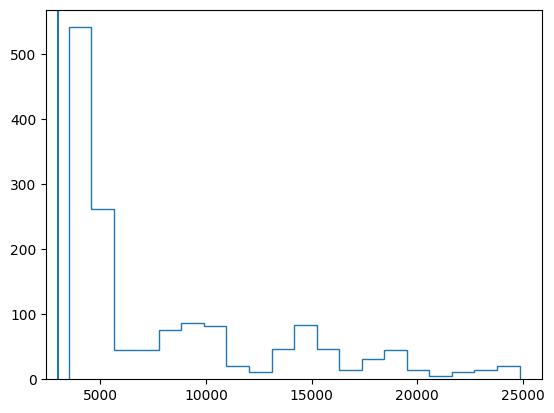

In [19]:
amps = np.load("Data/raw_amps_p2.npz")
TV6 = np.sort(amps['arr_0'])
TV7 = np.sort(amps['arr_1'])
TV8 = np.sort(amps['arr_2'])
TV9 = np.sort(amps['arr_3'])
all_TV = np.sort(np.concatenate((TV6,TV7,TV8,TV9)))
outliers = all_TV[all_TV > 3000]
plt.hist(outliers, bins='auto', histtype='step', density=False)
plt.yscale('linear')
plt.axvline(x=3000)
print(len(outliers))


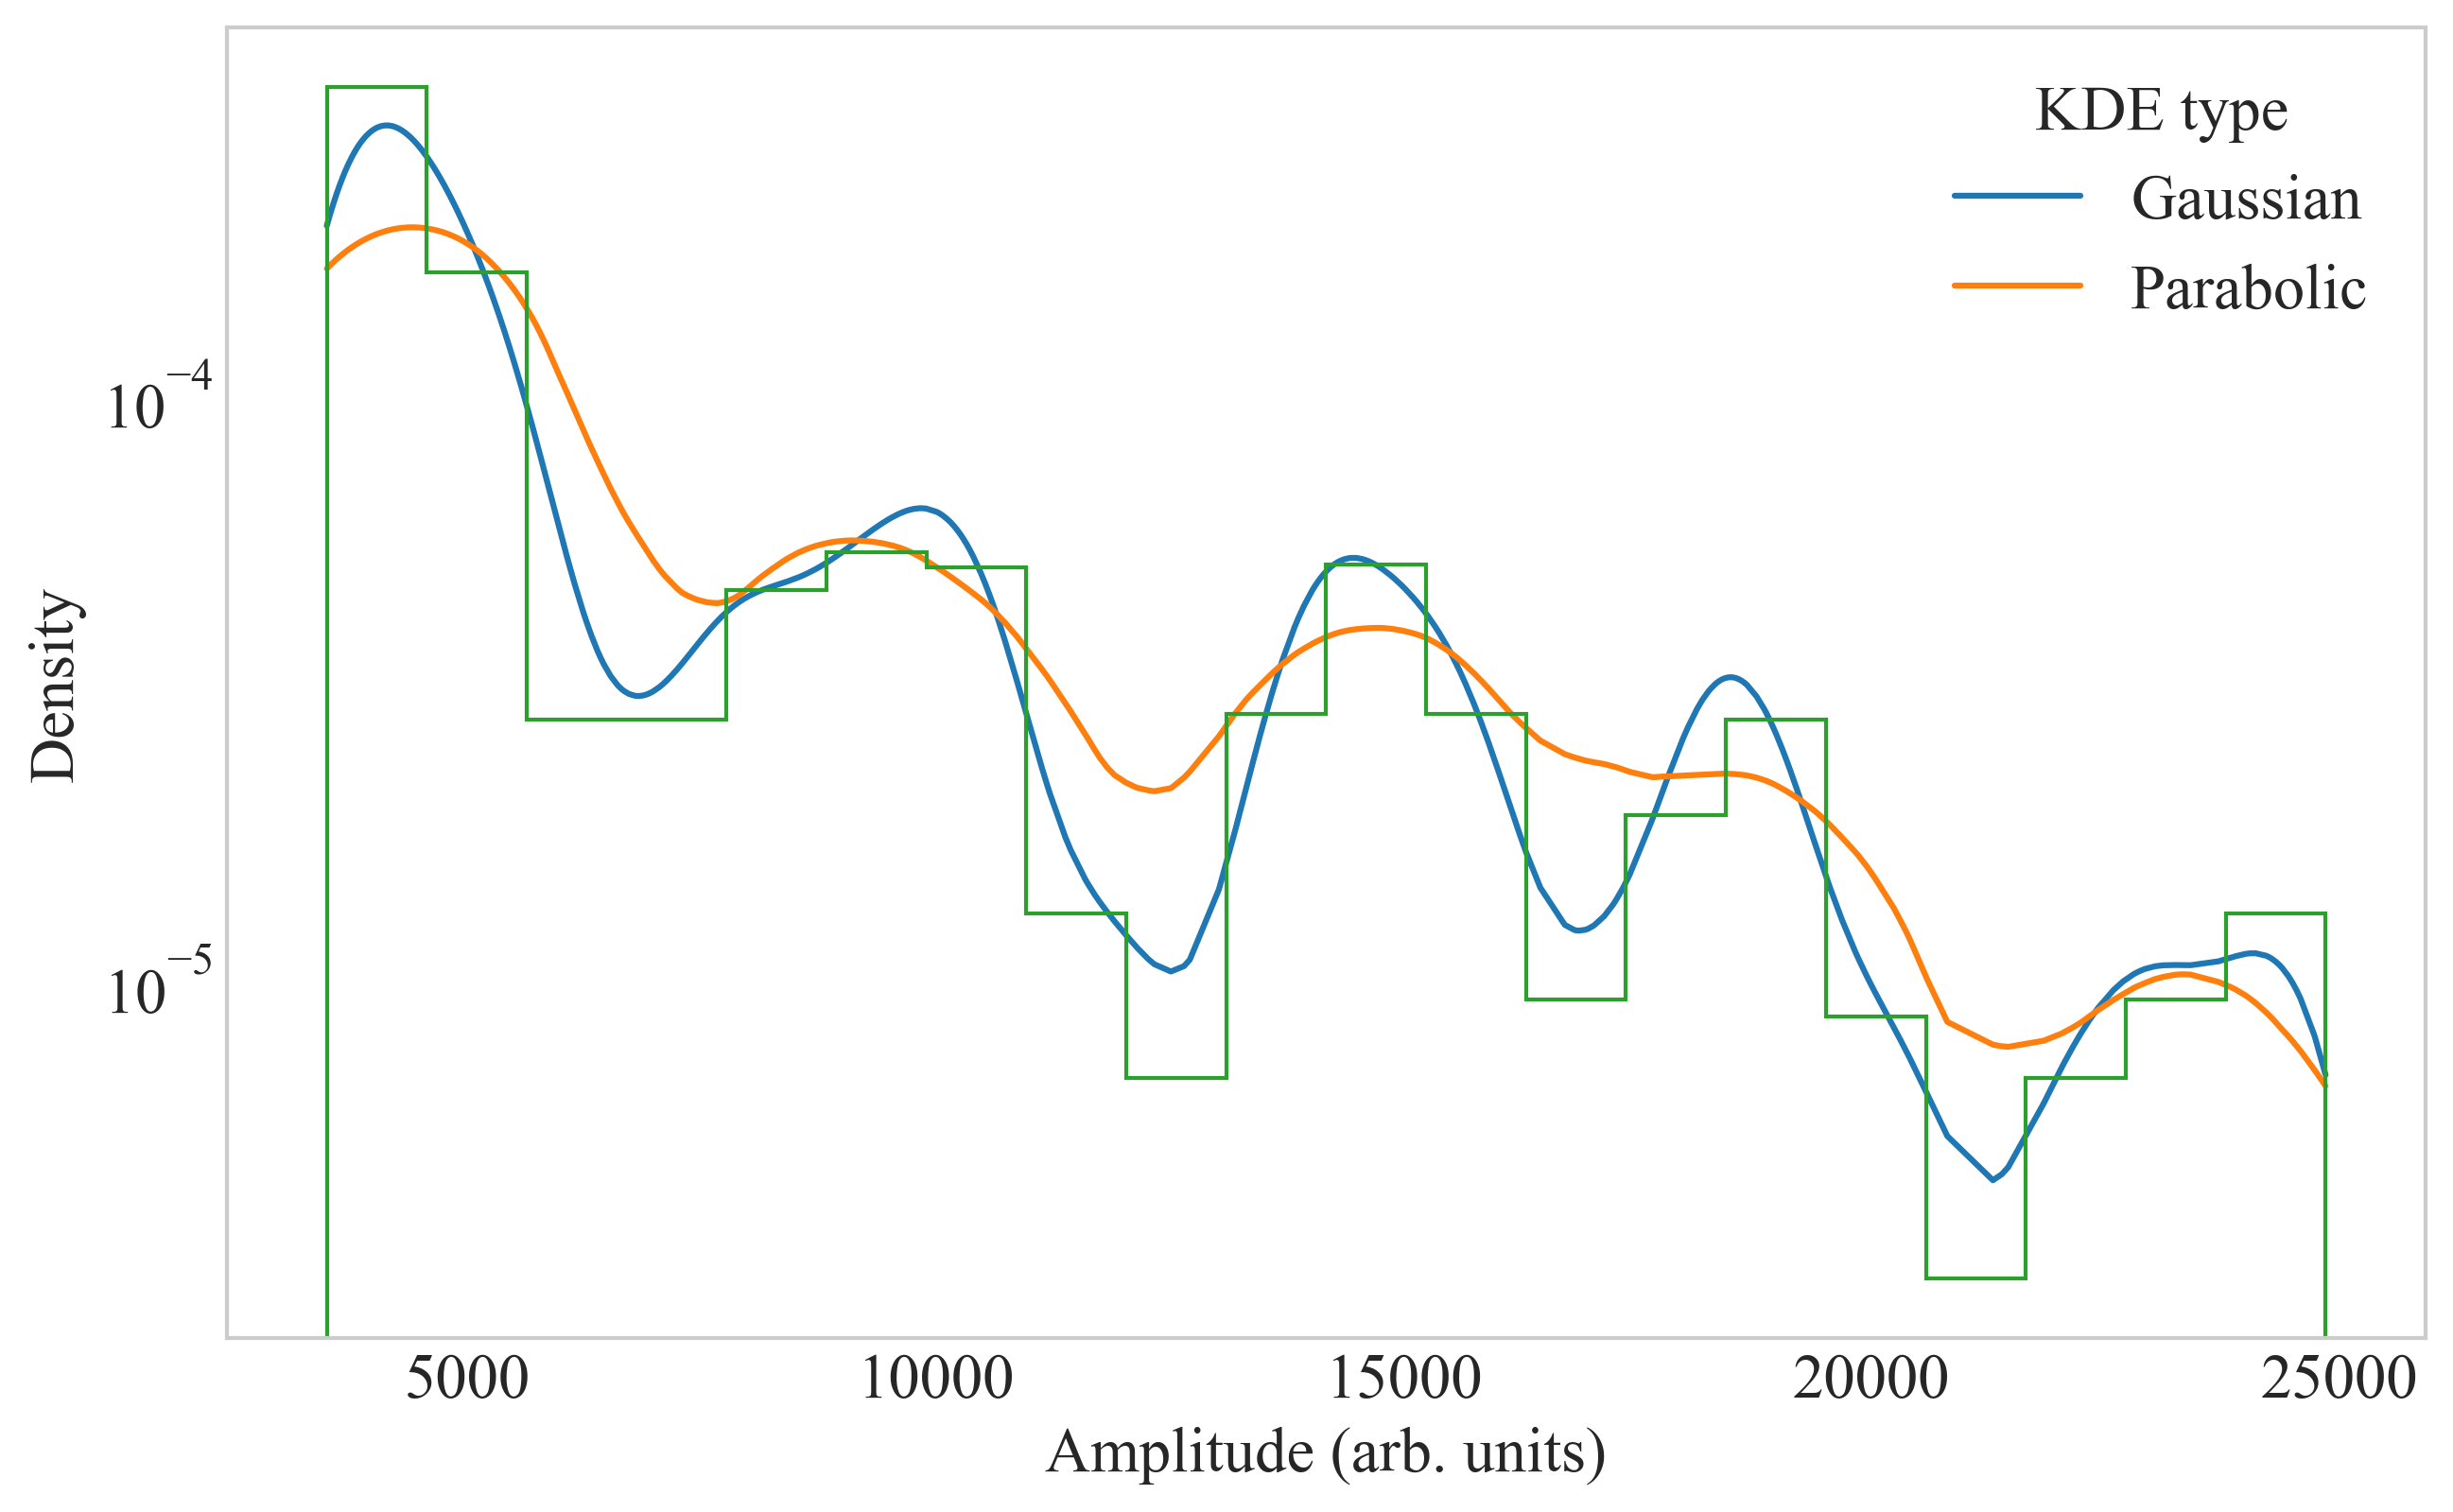

In [54]:
smooth = 10

def gauss_kern(data, smooth=0.1):
    fit_func = 0

    for x in data:
        fit_func += np.exp(-0.5*((data - x)/(np.std(data)*smooth))**2)
    
    return fit_func/np.trapezoid(fit_func, data)


def para_kern(data, smooth=1000):
    fit_func = 0

    for x in data:
        fit_func += np.where(-(data - x)**2/np.std(data)/smooth + 1 > 0,
                             -(data - x)**2/np.std(data)/smooth + 1, 0)
    
    return fit_func/np.trapezoid(fit_func, data)

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 6), dpi=300)
plt.grid(visible=False)
plt.plot(outliers, gauss_kern(outliers), label='Gaussian')
plt.plot(outliers, para_kern(outliers), label='Parabolic')
plt.legend(title='KDE type')
plt.hist(outliers, bins='auto', histtype='step', density=True)
plt.xlabel("Amplitude (arb. units)")
plt.ylabel("Density")
plt.yscale('log')
plt.minorticks_on()
plt.show()

trap = np.trapezoid(para_kern(outliers), outliers)


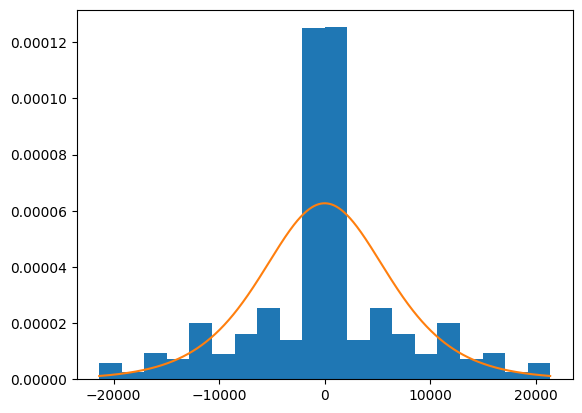

[6.98221747e-10 7.01025848e-10 7.03846875e-10 7.06684964e-10
 7.09540254e-10 7.12412884e-10 7.15302994e-10 7.18210726e-10
 7.21136225e-10 7.24079635e-10 7.27041103e-10 7.30020777e-10
 7.33018806e-10 7.36035341e-10 7.39070535e-10 7.42124542e-10
 7.45197518e-10 7.48289621e-10 7.51401009e-10 7.54531843e-10
 7.57682285e-10 7.60852501e-10 7.64042654e-10 7.67252914e-10
 7.70483449e-10 7.73734431e-10 7.77006031e-10 7.80298426e-10
 7.83611791e-10 7.86946306e-10 7.90302150e-10 7.93679506e-10
 7.97078557e-10 8.00499491e-10 8.03942496e-10 8.07407761e-10
 8.10895480e-10 8.14405846e-10 8.17939056e-10 8.21495308e-10
 8.25074804e-10 8.28677747e-10 8.32304341e-10 8.35954794e-10
 8.39629316e-10 8.43328119e-10 8.47051418e-10 8.50799428e-10
 8.54572370e-10 8.58370465e-10 8.62193937e-10 8.66043012e-10
 8.69917920e-10 8.73818892e-10 8.77746163e-10 8.81699970e-10
 8.85680551e-10 8.89688150e-10 8.93723012e-10 8.97785384e-10
 9.01875517e-10 9.05993665e-10 9.10140084e-10 9.14315033e-10
 9.18518774e-10 9.227515

In [21]:
import scipy.stats as st
reflect = np.concatenate((outliers - np.min(outliers),
                          np.min(outliers) - outliers))
#outliers[gauss_kern(outliers) == np.max(gauss_kern(outliers))]

x = np.linspace(np.min(reflect), np.max(reflect), 1000)

b = np.std(reflect)/np.sqrt(2)

s = np.sqrt(3)*np.std(reflect)/np.pi


plt.hist(reflect, bins = 20, density=True)
plt.yscale('linear')
plt.plot(x, np.exp(-x/s)/(s*(1+np.exp(-x/s))**2))
#plt.plot(x, np.exp(-0.5*(x/np.std(reflect))**2)/np.sqrt(2*np.pi*np.std(reflect)**2))
#plt.plot(x, 1/(np.pi*np.std(reflect)*(1+(x/np.std(reflect))**2)))
#plt.plot(reflect, st.t.pdf(reflect, 10))
plt.show()

print(st.t.pdf(x, 1))

print(st.kurtosis(reflect, fisher=True))

4795.8783980020635
5415.396448815983


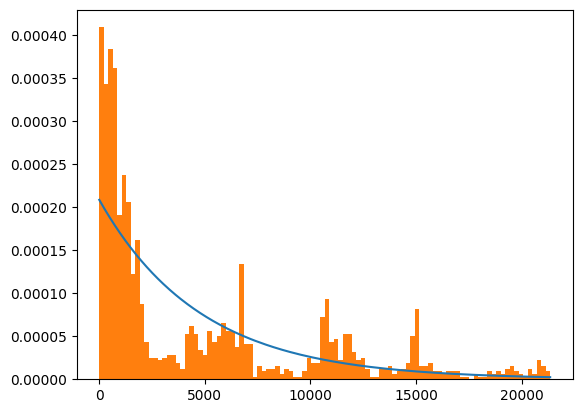

In [22]:
diffs = np.sort(outliers-np.min(outliers))

l = 1/np.mean(diffs)
print(1/l)
print(np.std(diffs))


plt.plot(diffs, l*np.exp(-l*diffs))

plt.hist(diffs, bins=100, density=True)
plt.yscale('linear')
plt.show()

print()

In [23]:
#Using raised cosine to collect amplitudes and locations and widths:

#Peaks, amplitudes (arb units)
peaks=np.array([53.35432366, 8.97030183, 39.32910956, 28.3103236, 30.93772398, 36.2624972, 15.55913153, 44.21889192,
       44.9823896, 36.18116225, 25.08418434, 33.37233714, 51.98871383, 71.11015838, 25.76393398, 17.09304232, 
       6.0885566, 11.14962293, 52.29949963, 44.91604231, 23.85311619, 57.59864797, 1.21500878e+01, 4.57578285e+01,
       43.16161392, 51.0379999, 16.44774823, 53.31619823, 85.09920858, 10.72147938, 18.26272233, 37.61133042,
       11.1810082, 12.82857739, 51.49711535, 20.3400262, 34.50876787, 46.37546283, 35.81477314, 36.96341681,
       9.18631159, 33.3049884, 6.10809826, 18.75778949, 26.21931248, 46.57467886, 22.82709187, 18.69584422,
       56.140001, 66.05041274, 61.65063534, 5.5279846, 7.64796047, 59.34091678, 63.71339591, 38.23994538])


#Time into pointing/length of pointing
loc=np.array([0.39361857, 0.94595976, 0.52309947, 0.1174075, 0.42087645, 0.55030397, 0.96448721, 0.95354939,
     0.5667833, 0.9647058, 0.13256501, 0.52036559, 0.18725956, 0.53959978, 0.81926798, 0.85710116, 
     0.19789189, 0.56327705, 0.62144842, 0.11526984, 0.44578389, 0.15972674, 1.84629939e-01, 8.81903585e-01,
     2.53746154e-01, 3.52378053e-01, 6.56658287e-01, 0.20640947, 0.9842502, 0.82448753, 0.79864468, 0.82609582,
     0.11022169, 0.07753185, 0.57244621, 0.0896191, 0.64090821, 0.4027631, 0.24795562, 0.72001842,
     0.10122139, 0.25738608, 0.64577568, 0.68554986, 0.45178244, 0.82402821, 0.16167855, 0.25189232,
     0.45948544, 0.53000544, 0.94603795, 0.41958575, 0.94060631, 0.4551634, 0.96417559, 0.68670813])

#Durations (s)
widths=np.array([46.35740966, 47.78082138, 52.01985143, 51.1243677, 48.66579981, 62.63576724, 51.55184647, 64.54810228,
        68.97618067, 63.08569669, 56.8891352, 64.68566024, 54.74073774, 57.955234, 35.92143505, 32.08070818,
        74.16922759, 57.12015228, 69.59804093, 65.70437593, 47.97567077, 82.01174163, 6.44723034e+01, 6.44048269e+01,
        6.87384350e+01, 6.99024843e+01, 5.66360677e+01, 73.41190595, 97.88771772, 38.34149624, 40.48260042, 62.84866352,
        39.34094184, 43.88357933, 68.20029216, 55.17499495, 59.64828645, 65.16642306, 59.59367969, 57.69014685,
        39.30030286, 25.61981977, 60.45653745, 36.25104968, 50.26782436, 66.64052355, 64.69421242, 35.47301949,
        57.35702717, 62.72083288, 57.83072425, 72.39670654, 7.68408292e+01, 56.47607773, 58.60065642, 58.92762818])

widths = np.sort(widths)
loc = np.sort(loc)
peaks = np.sort(peaks)


In [24]:
from SSINS import INS, Catalog_Plot as cp

ins = INS('Data/109319_p3_SSINS_data.h5')

cp.INS_plot(ins, 'niagara', file_ext='pdf')

invalid value encountered in multiply
invalid value encountered in divide


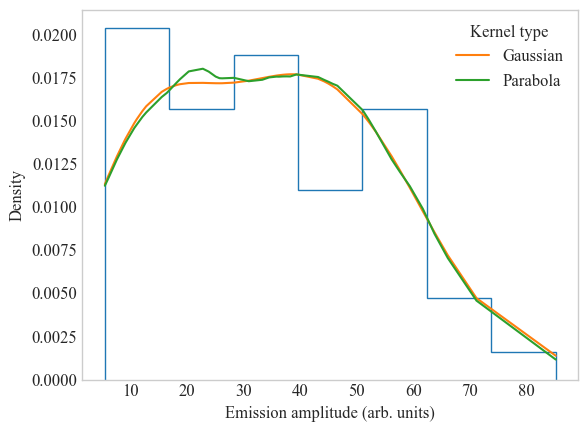

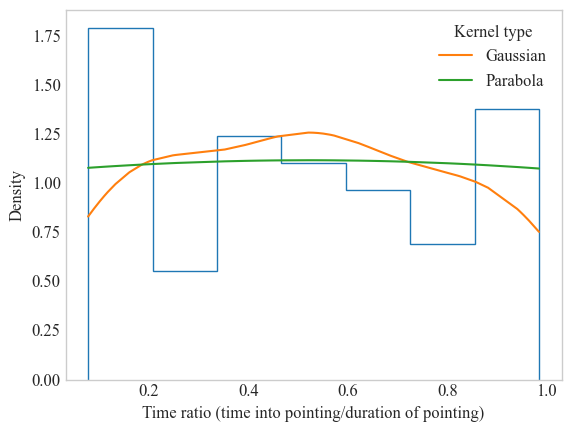

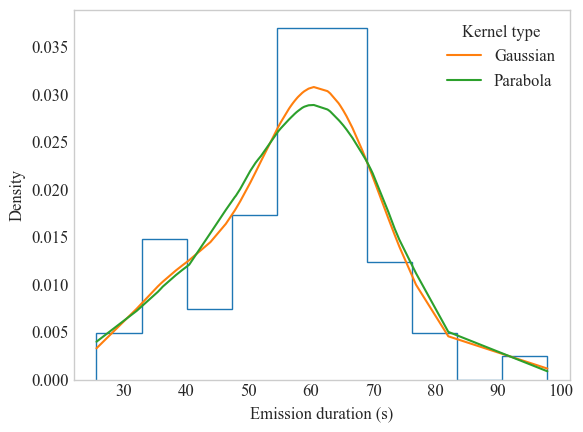

In [47]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12,
                     'font.family': 'serif',
                     'font.serif': 'Times New Roman'})

plt.grid(visible=False)

plt.hist(peaks, bins='auto', density=True, histtype='step')
plt.plot(peaks, gauss_kern(peaks, smooth=0.5), label='Gaussian')
plt.plot(peaks, para_kern(peaks, smooth=20), label='Parabola')
plt.legend(title='Kernel type')
plt.xlabel('Emission amplitude (arb. units)')
plt.ylabel('Density')
plt.show()

plt.grid(visible=False)
plt.hist(loc, bins='auto', density=True, histtype='step')
plt.plot(loc, gauss_kern(loc, smooth=0.5), label='Gaussian')
plt.plot(loc, para_kern(loc, smooth=20), label='Parabola')
plt.legend(title='Kernel type')
plt.xlabel('Time ratio (time into pointing/duration of pointing)')
plt.ylabel('Density')
plt.show()

plt.grid(visible=False)
plt.hist(widths, bins='auto', density=True, histtype='step')
plt.plot(widths, gauss_kern(widths, smooth=0.5), label='Gaussian')
plt.plot(widths, para_kern(widths, smooth=20), label='Parabola')
plt.legend(title='Kernel type')
plt.xlabel('Emission duration (s)')
plt.ylabel('Density')
plt.show()

In [26]:
print(np.mean(loc), np.std(loc))

print(np.mean(widths), np.std(widths))

print(np.mean(peaks), np.std(peaks))

print(st.kurtosis(widths))

print(np.mean(((widths - np.mean(widths))/np.std(widths))**4))

0.5209303355 0.28830425068632065
57.52279607678572 13.197945296648667
34.31222220035714 19.103289389790813
0.5887726307301175
3.588772630730116


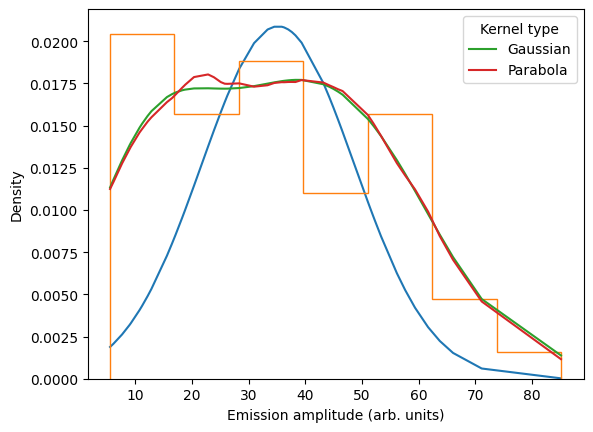

In [27]:
peaks = np.array(peaks)

plt.plot(peaks, np.exp(-((peaks-np.median(peaks))/np.std(peaks))**2)/np.sqrt(2*np.pi*np.std(peaks)**2))
plt.hist(peaks, bins='auto', density=True, histtype='step')
plt.plot(peaks, gauss_kern(peaks, smooth=0.5), label='Gaussian')
plt.plot(peaks, para_kern(peaks, smooth=20), label='Parabola')
plt.legend(title='Kernel type')
plt.xlabel('Emission amplitude (arb. units)')
plt.ylabel('Density')
plt.show()